**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
dataframe1= pd.read_csv('C:\\Users\\HP\\Downloads\\Supervised_learning_project\\2Classdata.csv')
dataframe1

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
dataframe1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
dataframe1.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
dataframe1.isnull().sum()  # This code indicates that there are no null values(missing value) on our dataframe

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [6]:
dataframe1['class'].unique()   # Unique values of class values 

array(['Abnormal', 'Normal'], dtype=object)

In [7]:
dataframe1.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [8]:
dataframe1.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [9]:
import matplotlib.pyplot as plt
dataframe1.hist(edgecolor='black')# linewidth=1.2
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

<Figure size 1200x1200 with 6 Axes>

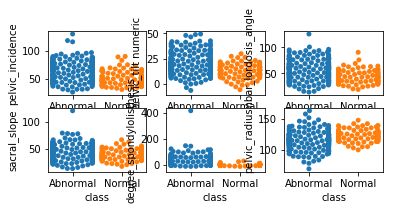

In [10]:
# Relation between class values and other attributes using Swarmplot

import seaborn as sns
plt.subplot(3,3,1)
sns.swarmplot(x='class',y='pelvic_incidence',data= dataframe1)
plt.subplot(3,3,2)
sns.swarmplot(x='class',y='pelvic_tilt numeric',data= dataframe1)
plt.subplot(3,3,3)
sns.swarmplot(x='class',y='lumbar_lordosis_angle',data= dataframe1)
plt.subplot(3,3,4)
sns.swarmplot(x='class',y='sacral_slope',data= dataframe1)
plt.subplot(3,3,5)
sns.swarmplot(x='class',y='degree_spondylolisthesis',data= dataframe1)
plt.subplot(3,3,6)
sns.swarmplot(x='class',y='pelvic_radius',data= dataframe1)

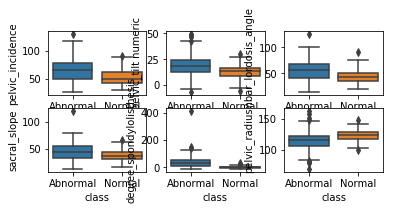

In [11]:
# Relation between class values and other attributes using Boxplot

import seaborn as sns
plt.subplot(3,3,1)
sns.boxplot(x='class',y='pelvic_incidence',data= dataframe1)
plt.subplot(3,3,2)
sns.boxplot(x='class',y='pelvic_tilt numeric',data= dataframe1)
plt.subplot(3,3,3)
sns.boxplot(x='class',y='lumbar_lordosis_angle',data= dataframe1)
plt.subplot(3,3,4)
sns.boxplot(x='class',y='sacral_slope',data= dataframe1)
plt.subplot(3,3,5)
sns.boxplot(x='class',y='degree_spondylolisthesis',data= dataframe1)
plt.subplot(3,3,6)
sns.boxplot(x='class',y='pelvic_radius',data= dataframe1)

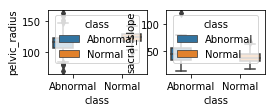

In [12]:

#the distribution of different classes for pelvic_radius and sacral_slope for visualization.

plt.subplot(3,3,1)
sns.boxplot(x='class',y='pelvic_radius',hue='class',data=dataframe1)
plt.subplot(3,3,2)
sns.boxplot(x='class',y='sacral_slope',hue='class',data=dataframe1)

# Encode the Class variable to integer.

In [13]:
# for x in 'class':
#     if dataframe1['class'].get_value == 'Abnormal':
#         dataframe1['class'] = dataframe1['class'].replace('Abnormal',0)
#         #dataframe1['class'] = dataframe1['class'].replace('Abnormal',0)
#     else:
#         dataframe1['class'] = dataframe1['class'].replace('Normal',1)

In [14]:
# for x in 'class':
#     dataframe1['class']=dataframe1['class'].replace('Abnormal',0)        # Method of hard - coding is been done here

In [15]:
# for x in 'class':
#     dataframe1['class']=dataframe1['class'].replace('Normal',1)

In [16]:
# for encoding the class variable to the integer, the datatypes should not of type integer 

from sklearn import preprocessing 
l_e = preprocessing.LabelEncoder()
# class_encoded_to_integer = l_e.fit_transform(dataframe1['class'])

categorical_mask= dataframe1.dtypes == object              #filtering out the columns that are under type == object
categorical_column = dataframe1.columns[categorical_mask].tolist()

#print(categorical_mask)    # Previously it will print the Fasle and True value
#print(categorical_column)   # This will print the 'class'


#dataframe1['class'] = dataframe1['class'].apply(lambda col: l_e.fit_tranform(col))

In [17]:
dataframe1[categorical_column]= dataframe1[categorical_column].apply(lambda col:l_e.fit_transform(col))

In [18]:
dataframe1.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int32
dtype: object

In [19]:
dataframe1

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


In [20]:
#dataframe1.isnull().sum()

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [21]:
X=dataframe1.iloc[:,:6]
y=dataframe1.iloc[:,6]


In [22]:
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437


In [23]:
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
280    1
281    1
282    1
283    1
284    1
285    1
286    1
287    1
288    1
289    1
290    1
291    1
292    1
293    1
294    1
295    1
296    1
297    1
298    1
299    1
300    1
301    1
302    1
303    1
304    1
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int32

# Normalize your Data (X) to get values between 0 to 1.

In [24]:
from scipy.stats import zscore

X=dataframe1.iloc[:,:6]
y=dataframe1.iloc[:,6]

X=X.apply(zscore)

In [25]:
X


# should try with the MinMaxScaler from preprocessing section

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
5,-1.176524,-0.362375,-1.447086,-1.240579,0.933162,-0.641789
6,-0.410474,-0.167980,-0.797069,-0.401840,0.199074,-0.541574
7,-0.879201,-0.679253,-1.235826,-0.622522,-0.048932,-0.985977
8,-0.970815,-0.401221,-0.498816,-0.947465,0.532664,-0.346886
9,-1.383620,-1.254175,-0.538875,-0.841579,-2.533058,-0.683556


In [33]:
y=pd.get_dummies(y,drop_first = True)
y

,1
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# Split the dat as train and test with a ratio of 70:30.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [35]:
len(X_train)

217

In [36]:
len(X_test)

93

In [37]:
len(y_test)

93

In [38]:
len(y_train)

217

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [366]:
NNH = KNeighborsClassifier(n_neighbors= 3)

In [367]:

NNH.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [368]:
predicted_labels = NNH.predict(X_test)

In [369]:
predicted_labels


array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0], dtype=uint8)

In [370]:
from sklearn import metrics
metrics.confusion_matrix(y_test,predicted_labels)

array([[54,  5],
       [14, 20]], dtype=int64)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [371]:
NNH.score(X_test,y_test)

# 3 - 0.795689
# 5 - 0.7956989247311828
# 7 - 0.8064516129032258
# 9 - 0.8279569892473119
# 11 - 0.8709677419354839
# 13 - 0.8709677419354839
# 15 - 0.8602150537634409
# 17 - 0.8387096774193549

# The best score accuracy score is available on k = 11

0.7956989247311828

In [372]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        59
           1       0.80      0.59      0.68        34

   micro avg       0.80      0.80      0.80        93
   macro avg       0.80      0.75      0.76        93
weighted avg       0.80      0.80      0.79        93



# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [373]:
# 7 - 0.8064516129032258
# 9 - 0.8279569892473119
# 11 - 0.8709677419354839
# 13 - 0.8602150537634409
# 15 - 0.8602150537634409
# 17 - 0.8387096774193549

# The best score accuracy score is available on k = 11

In [374]:
NNH = KNeighborsClassifier(n_neighbors=3)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
predicted_labels

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0], dtype=uint8)

In [375]:
NNH.score(X_train,y_train)

0.9262672811059908

In [376]:
# 3- 0.9262672811059908
# 5- 0.8755760368663594
# 7- 0.8525345622119815
# 9-0.8387096774193549
# 11-0.815668202764977
# 13-0.8202764976958525
# 15-0.8248847926267281
# 17-0.8248847926267281

The best  k-Neighbourest value is 3

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [377]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [378]:
dataframe2= pd.read_csv('C:\\Users\\HP\\Downloads\\Supervised_learning_project\\3Classdata.csv')
dataframe2

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [379]:
dataframe2.isnull().sum()  # The code will sum number of true conditions on the dataframe

#dataframe2['class'].value_counts()   # This code will give class value segregation

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [380]:
dataframe2.info()

# dataframe2.isnull().value_counts()     will also do the same with additional information of datatype and (row and columns - count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [381]:
dataframe2.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [382]:
dataframe2['class'] = dataframe2['class'].astype('category')
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null category
dtypes: category(1), float64(6)
memory usage: 15.0 KB


In [383]:
dataframe2.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [384]:
dataframe2.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [385]:
dataframe2.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


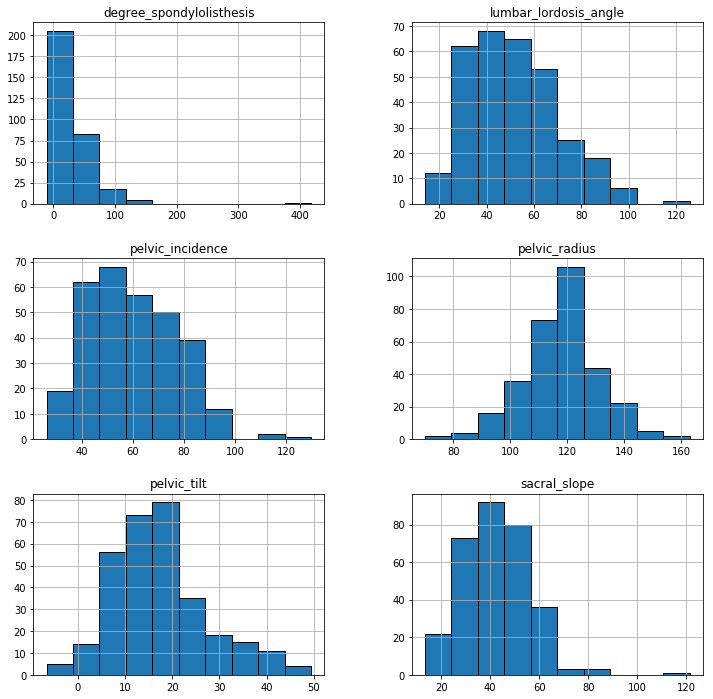

In [386]:
dataframe2.hist(edgecolor='black')# linewidth=1.2
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

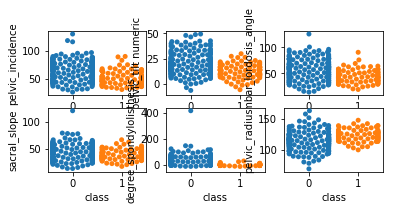

In [387]:
plt.subplot(3,3,1)
sns.swarmplot(x='class',y='pelvic_incidence',data= dataframe1)
plt.subplot(3,3,2)
sns.swarmplot(x='class',y='pelvic_tilt numeric',data= dataframe1)
plt.subplot(3,3,3)
sns.swarmplot(x='class',y='lumbar_lordosis_angle',data= dataframe1)
plt.subplot(3,3,4)
sns.swarmplot(x='class',y='sacral_slope',data= dataframe1)
plt.subplot(3,3,5)
sns.swarmplot(x='class',y='degree_spondylolisthesis',data= dataframe1)
plt.subplot(3,3,6)
sns.swarmplot(x='class',y='pelvic_radius',data= dataframe1)

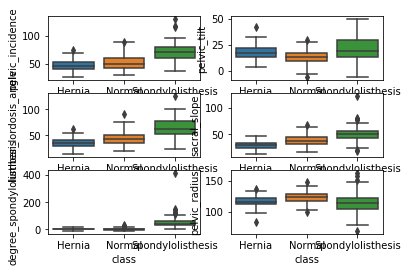

In [388]:
plt.subplot(3,2,1)
sns.boxplot(x='class',y='pelvic_incidence',data=dataframe2)
plt.subplot(3,2,2)
sns.boxplot(x='class',y='pelvic_tilt',data=dataframe2)
plt.subplot(3,2,3)
sns.boxplot(x='class',y='lumbar_lordosis_angle',data=dataframe2)
plt.subplot(3,2,4)
sns.boxplot(x='class',y='sacral_slope',data=dataframe2)
plt.subplot(3,2,5)
sns.boxplot(x='class',y='degree_spondylolisthesis',data=dataframe2)
plt.subplot(3,2,6)
sns.boxplot(x='class',y='pelvic_radius',data=dataframe2)

In [389]:
from sklearn import preprocessing
l_e=preprocessing.LabelEncoder()
# class_encoded_to_integer = l_e.fit_transform(dataframe2['class'])
l_e.fit(list(dataframe2['class'].values))
dataframe2['class']= l_e.transform(list(dataframe2['class'].values))

In [390]:
dataframe2

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


In [391]:
dataframe2['class'].values    # To check the y values are get labelled in the numericals

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [392]:
dataframe2.dtypes  # Chane of the category to integer datatype

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int64
dtype: object

In [393]:
X1 = dataframe2.iloc[:,:6]  # Segregation for the test and train
y1 = dataframe2.iloc[:,6]

In [394]:
X1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437


# 

In [395]:
y1

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
280    1
281    1
282    1
283    1
284    1
285    1
286    1
287    1
288    1
289    1
290    1
291    1
292    1
293    1
294    1
295    1
296    1
297    1
298    1
299    1
300    1
301    1
302    1
303    1
304    1
305    1
306    1
307    1
308    1
309    1
Name: class, Length: 310, dtype: int64

In [396]:
# For normalizing the X value 
X1= X1.apply(zscore)

In [397]:
X1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
5,-1.176524,-0.362375,-1.447086,-1.240579,0.933162,-0.641789
6,-0.410474,-0.167980,-0.797069,-0.401840,0.199074,-0.541574
7,-0.879201,-0.679253,-1.235826,-0.622522,-0.048932,-0.985977
8,-0.970815,-0.401221,-0.498816,-0.947465,0.532664,-0.346886
9,-1.383620,-1.254175,-0.538875,-0.841579,-2.533058,-0.683556


In [398]:
#preprocessing.normalize(X1)

In [399]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [400]:
len(X1_train)

217

In [401]:
len(X1_test)

93

In [402]:
len(y1_train)

217

In [403]:
len(y1_test)

93

In [404]:
KKN1 =KNeighborsClassifier(n_neighbors =19)
KKN1.fit(X1_train,y1_train)
predicted_labels1 = KKN1.predict(X1_test)
predicted_labels1

array([1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 1], dtype=int64)

In [407]:
KKN1.score(X1_train,y1_train)

# 0.77418
# 0.75278817
# 0.7849462365591398
# 0.7849462365591398
# 0.74193548387
# 0.7849462365591398
# 0.7849462365591398

0.8018433179723502

In [408]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        59
           1       0.80      0.59      0.68        34

   micro avg       0.80      0.80      0.80        93
   macro avg       0.80      0.75      0.76        93
weighted avg       0.80      0.80      0.79        93

